In [1]:
import pandas as pd
parquet_files=['book2.parquet','home2.parquet','personal_care2.parquet']
dataframes=[pd.read_parquet(files) for files in parquet_files]
df=pd.concat(dataframes,ignore_index=True)

In [2]:
df.columns

Index(['main_category', 'title', 'features'], dtype='object')

In [3]:
df['features'][0]

"🌼[MEET YOUR HAIR COLOR NEEDS] Bright color, high-quality hair chalk. The comb applicators make it quick and easy to put dazzling colors into your hair. Your hair will be supple and natural, not stiff and sticky. 🌼[Shiyeen COLORFUL HAIR CHALK COMBS SET] Contains White, purple, blue, orange, pink, red, cyan, green, brown, Rose ,10 bright colors, Disposable gloves, hair dye shawl. 🌼[NON-TOXIC & EASY TO WASH] The hair chalk is non-allergenic , non-toxic and water-soluble and environmentally friendly ; apply it to hair evenly from top to bottom and washes out with ordinary shampoo and water. 🌼[USING SIMPLE] The hair chalks are perfect for going wild! Even kids are able to use them on their own super easily. With a waxy lipstick texture, DIY your hair color with your different dress-up or mood in different colors. you can keep your new look for as long as you like. ❤[Shiyeen PROMISE]100% RISK FREE PURCHASE: We're so confident about the quality of our hair chalk comb that if you have any iss

In [4]:
## removing all numbers in the feature columns: 
import re
import string
import emoji
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
def remove_num(text):
    text=remove_punctuation(text)
    text=emoji.replace_emoji(text, replace='')
    text=text.lower()
    return re.sub(r'\d+','',text)

#df['features']= df['features'].apply(remove_num)



In [5]:
## labeling the response column with numerical value
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['response']=label_encoder.fit_transform(df['main_category'])

In [6]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize text - remove stop words
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
# Creating embedding using TF-IDF
#tdif=TfidfVectorizer(stop_words='english', preprocessor=lemmatize_text)  ## we can customize stop_words list as well . using default stop_words='english' has very minimal list. Instead we process stop_words and remove it using spacy  
#X=tdif.fit_transform(df['features'])
#joblib.dump((tdif,X), 'review_vectorizer.pkl.gz',compress=('gzip',3))

In [8]:
#X.shape
# Load the review embedding
_,X=joblib.load('review_vectorizer.pkl.gz')



In [9]:
print(X.shape)

(3000000, 735850)


In [10]:
# Checking dimension and num # of data being loaded
Y=df['response']

Splitting data into training and testing 

In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, stratify=Y,train_size=.7,random_state=42)

Fitting logistic with td-idf embedding and feature

In [25]:
# train model 
#logmod_f=LogisticRegressionCV(max_iter=1000000,solver='lbfgs',multi_class='multinomial').fit(X,df['response'])
## saving the logistic model for future use 
#joblib.dump(logmod_f,'LogisticModel_feature_tdif.pkl',compress=('gzip',3))

In [12]:
## loading pre-train model 
import joblib
logmod_f= joblib.load('LogisticModel_feature_tdif.pkl')

In [13]:
from sklearn.metrics import classification_report
print("training error ")
print(classification_report(ytrain,logmod_f.predict(xtrain)))
print("testing error")
print(classification_report(ytest,logmod_f.predict(xtest)))

training error 
              precision    recall  f1-score   support

           0       0.50      0.38      0.43    700000
           1       0.95      0.77      0.85    700000
           2       0.42      0.60      0.50    700000

    accuracy                           0.58   2100000
   macro avg       0.62      0.58      0.59   2100000
weighted avg       0.62      0.58      0.59   2100000

testing error
              precision    recall  f1-score   support

           0       0.50      0.38      0.43    300000
           1       0.95      0.77      0.85    300000
           2       0.42      0.60      0.50    300000

    accuracy                           0.58    900000
   macro avg       0.62      0.58      0.59    900000
weighted avg       0.62      0.58      0.59    900000



[[113321   6369 180310]
 [  2062 230604  67334]
 [113392   6447 180161]]


Text(0.5, 1.0, 'Confusion Matrix for TD-IDF ')

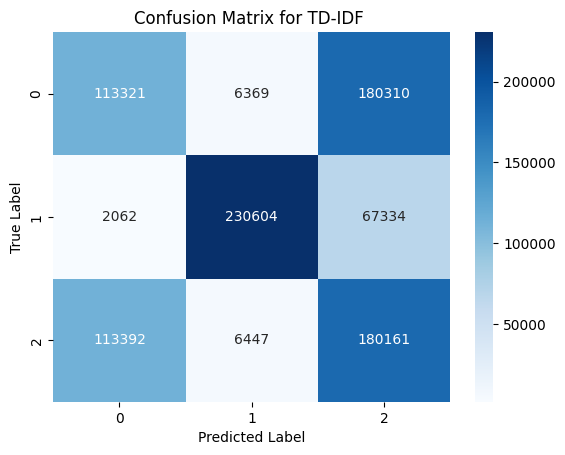

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,logmod_f.predict(xtest)))
from matplotlib import pyplot as plt 
import seaborn as sns 
plt.figure()
sns.heatmap(confusion_matrix(ytest,logmod_f.predict(xtest)), annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title('Confusion Matrix for TD-IDF ')